In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)

In [708]:
import re
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, accuracy_score

In [709]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier

In [710]:
from utils import (load_dataset,save_dataset)

In [711]:
df_train = load_dataset('Train')
df_test = load_dataset('Test')
#df_sub = load_dataset('Sample_Submission')
print(df_train.shape)
print(df_test.shape)

(16516, 11)
(24776, 10)


In [712]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Category             16516 non-null  object 
 2   Rating               16516 non-null  float64
 3   Reviews              16516 non-null  int64  
 4   Size                 16516 non-null  object 
 5   Price                16516 non-null  object 
 6   Content_Rating       16516 non-null  object 
 7   Last_Updated_On      16516 non-null  object 
 8   Release_Version      16516 non-null  object 
 9   OS_Version_Required  16516 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [713]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           24776 non-null  object 
 1   Category             24776 non-null  object 
 2   Rating               24776 non-null  float64
 3   Reviews              24776 non-null  int64  
 4   Size                 24776 non-null  object 
 5   Price                24776 non-null  object 
 6   Content_Rating       24776 non-null  object 
 7   Last_Updated_On      24776 non-null  object 
 8   Release_Version      24776 non-null  object 
 9   OS_Version_Required  24776 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


In [714]:
print(df_train['Downloads'].unique())
print(len(df_train['Downloads'].unique()))

['100,000+' '5,000+' '10,000+' '10,000,000+' '50,000+' '1,000,000+'
 '5,000,000+' '500,000+' '1,000+' '1,000,000,000+' '50,000,000+' '100+'
 '100,000,000+' '500+' '10+' '50+' '500,000,000+' '5,000,000,000+']
18


In [715]:
df_train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [716]:
df_test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [717]:
for cols in df_train.columns:
    print(cols,len(df_train[cols].unique()))

Offered_By 15520
Category 51
Rating 319
Reviews 9124
Size 439
Price 83
Content_Rating 6
Last_Updated_On 1583
Release_Version 4190
OS_Version_Required 27
Downloads 18


In [718]:
id_set_tr = set(df_train['Offered_By'])
id_set_ts = set(df_test['Offered_By'])
print(len(id_set_tr.intersection(id_set_ts)))
#print(id_set_tr.intersection(id_set_ts))

1542


In [719]:
df_train[df_train['Offered_By']=='ps_id-26414']

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
12925,ps_id-26414,Shopping,4.3,46153,17M,Free,Everyone,Sep 08 2019,2.124.01,4.4 and up,"10,000,000+"


In [720]:
df_test[df_test['Offered_By']=='ps_id-26414']

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
13760,ps_id-26414,Shopping,4.34,56378,20M,Free,Everyone,Apr 23 2020,2.154,4.4 and up
17637,ps_id-26414,Shopping,4.30,46153,17M,Free,Everyone,Sep 08 2019,2.124.01,4.4 and up


## Start

In [721]:
df_test['Downloads'] = 'NA'
df_full = pd.concat([df_train,df_test],axis=0,ignore_index=True)

In [722]:
df_full.shape

(41292, 11)

In [723]:
df_full['Size'].describe()

count                  41292
unique                   703
top       Varies with device
freq                    4830
Name: Size, dtype: object

In [724]:
df_full['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [725]:
def generate_key(df_data):
    
    df= df_data.copy()
    
    df['key'] = df['Offered_By'] + '_' + df['Category'] + '_' + df['Rating'].astype(str) + '_' + df['Reviews'].astype(str) + '_' + df['Size'] + '_' + df['Price'] + '_' + df['Content_Rating'] + '_' + df['Last_Updated_On'] + '_' + df['Release_Version'] + '_' + df['OS_Version_Required']
    
    return df

In [726]:
def modify_category(x):
    val = x
    if 'Game' in x:
        val = 'Game'
    return val 

In [727]:
def data_transform(df_data):
    df = df_data.copy()
    
    df = generate_key(df)
    
    #Category
    df['Category_Modified'] = df['Category'].apply(lambda x : modify_category(x))
    
    #Size
    df['Size_Unit'] = df['Size'].apply(lambda x : x[-1:])
    df['Size_Num'] = df['Size'].str.replace(',','')
    df['Size_Num'] = np.where(df['Size_Num']!='Varies with device',df['Size_Num'].apply(lambda x : x[:-1]),-1)
    df['Size_Num'] = df['Size_Num'].astype(float)
    
    
    #condition = (() & (df['Size_Unit']!='Varies with device'))                              
    df['Size_Num'] = np.where(df['Size_Unit']=='k',df['Size_Num']/1000,df['Size_Num'])
    
    #Price
    df['Price'] = np.where(df['Price']=='Free',0,df['Price'])
    df['Price'] = df['Price'].astype(float)
    
    #Last_Updated_On
    df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])
    df['Year']= df['Last_Updated_On'].dt.year
    df['Month']= df['Last_Updated_On'].dt.month
    df['Day']= df['Last_Updated_On'].dt.day
    df['DayOfYear']= df['Last_Updated_On'].dt.dayofyear
    df['Week']= df['Last_Updated_On'].dt.week
    df['WeekOfYear']= df['Last_Updated_On'].dt.weekofyear
    df['DayOfWeek']= df['Last_Updated_On'].dt.dayofweek
    df['Quarter']= df['Last_Updated_On'].dt.quarter
    max_date_plus_1 = max(df['Last_Updated_On']) + timedelta(days=1)
    df['Recency'] = (max_date_plus_1 - df['Last_Updated_On']).dt.days
    
    #Release_Version
    df['Major_Version'] = df['Release_Version'].apply(lambda x : re.findall(r'([0-9]+)\.[0-9]+',x))
    #df['Major_Version_Len'] = df['Major_Version'].apply(lambda x: len(x))
    df['Major_Version'] = df['Major_Version'].apply(lambda x : x[0] if len(x)>0 else -1)
    
    df['Major_Version'] = np.where(df['Release_Version'].str.isdigit(),df['Release_Version'],df['Major_Version'])
    #df['Major_Version'] = np.where(df['Release_Version']=='Varies with device',-1,df['Major_Version'])
    df['Major_Version'] = df['Major_Version'].astype(float)
    
    df['Minor_Version'] = df['Release_Version'].apply(lambda x : re.findall(r'[0-9]+\.([0-9]+)',x))
    #df['Minor_Version_Len'] = df['Minor_Version'].apply(lambda x: len(x))
    df['Minor_Version'] = df['Minor_Version'].apply(lambda x : x[0] if len(x)>0 else -1)
    #df['Minor_Version'] = np.where(df['Minor_Version_Len']>0,df['Major_Version'].apply(lambda x : x[0]),0)
    df['Minor_Version'] = np.where(df['Release_Version']=='Varies with device',-1,df['Minor_Version'])
    df['Minor_Version'] = df['Minor_Version'].astype(float)
    
    
    df['Build_Version'] = df['Release_Version'].apply(lambda x : re.findall(r'[0-9]+\.[0-9]+\.([0-9]+)',x))
    #df['Minor_Version_Len'] = df['Minor_Version'].apply(lambda x: len(x))
    df['Build_Version'] = df['Build_Version'].apply(lambda x : x[0] if len(x)>0 else -1)
    #df['Minor_Version'] = np.where(df['Minor_Version_Len']>0,df['Major_Version'].apply(lambda x : x[0]),0)
    df['Build_Version'] = np.where(df['Release_Version']=='Varies with device',-1,df['Build_Version'])
    df['Build_Version'] = df['Build_Version'].astype(float)
    
    
    df['Revision_Version'] = df['Release_Version'].apply(lambda x : re.findall(r'[0-9]+\.[0-9]+\.[0-9]+\.([0-9]+)',x))
    #df['Minor_Version_Len'] = df['Minor_Version'].apply(lambda x: len(x))
    df['Revision_Version'] = df['Revision_Version'].apply(lambda x : x[0] if len(x)>0 else -1)
    #df['Minor_Version'] = np.where(df['Minor_Version_Len']>0,df['Major_Version'].apply(lambda x : x[0]),0)
    df['Revision_Version'] = np.where(df['Release_Version']=='Varies with device',-1,df['Revision_Version'])
    df['Revision_Version'] = df['Revision_Version'].astype(float)
    
    
    #OS_Version_Required
    df['Major_OS_Version'] = np.where(df['OS_Version_Required']!='Varies with device',
                                  df['OS_Version_Required'].apply(lambda x : x[0]),
                                  -1)
    df['Major_OS_Version'] = df['Major_OS_Version'].astype(float)
    
    df['Minor_OS_Version'] = np.where(df['OS_Version_Required']!='Varies with device',
                                  df['OS_Version_Required'].apply(lambda x : x[2]),
                                  -1)
    
    df['Minor_OS_Version'] = df['Minor_OS_Version'].astype(float)
    
    df['Limited_OS_Version'] = np.where(df['OS_Version_Required']!='Varies with device',
                                  df['OS_Version_Required'].apply(lambda x : 'Limited' if '-' in x else 'Expandable'),
                                  df['OS_Version_Required'])
    
    #Key based features
    '''
    df['key'] = df['Category'] + '_' + df['Content_Rating']
    
    df_rating_map = df.groupby('key')['Rating'].agg(['mean','min','max','std','median'])
    df_rating_map.reset_index(inplace=True)
    df_rating_map.columns = ['key'] + ['Rating_'+x for x in ['mean','min','max','std','median']]
    
    df_review_map = df.groupby('key')['Reviews'].agg(['mean','min','max','std','median'])
    df_review_map.reset_index(inplace=True)
    df_review_map.columns = ['key'] + ['Reviews_'+x for x in ['mean','min','max','std','median']]
    
    df = pd.merge(df,df_rating_map,how='inner',on='key')
    df = pd.merge(df,df_review_map,how='inner',on='key')
    '''
    
    return df

In [728]:
df_full_treated = data_transform(df_full)

In [729]:
df_full_treated.columns

Index(['Offered_By', 'Category', 'Rating', 'Reviews', 'Size', 'Price',
       'Content_Rating', 'Last_Updated_On', 'Release_Version',
       'OS_Version_Required', 'Downloads', 'key', 'Category_Modified',
       'Size_Unit', 'Size_Num', 'Year', 'Month', 'Day', 'DayOfYear', 'Week',
       'WeekOfYear', 'DayOfWeek', 'Quarter', 'Recency', 'Major_Version',
       'Minor_Version', 'Build_Version', 'Revision_Version',
       'Major_OS_Version', 'Minor_OS_Version', 'Limited_OS_Version'],
      dtype='object')

In [730]:
df_full_treated.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
key                    0
Category_Modified      0
Size_Unit              0
Size_Num               0
Year                   0
Month                  0
Day                    0
DayOfYear              0
Week                   0
WeekOfYear             0
DayOfWeek              0
Quarter                0
Recency                0
Major_Version          0
Minor_Version          0
Build_Version          0
Revision_Version       0
Major_OS_Version       0
Minor_OS_Version       0
Limited_OS_Version     0
dtype: int64

In [731]:
columns_to_encode = [
    #'Offered_By',
    'Category',
    #'Rating',
    #'Reviews',
    #'Size',
    #'Price',
       'Content_Rating',
    #'Last_Updated_On',
    #'Release_Version',
       #'OS_Version_Required',
    #'Downloads',
    'Category_Modified',
    'Size_Unit',
       #'Size_Num',
    #'Year',
    #'Month',
    #'Day',
    #'DayOfYear',
    #'Week',
    
       #'WeekOfYear',
    #'DayOfWeek',
    #'Quarter',
    #'Recency',
    #'Major_Version',
    #   'Minor_Version',
    #'Major_OS_Version',
    #'Minor_OS_Version',
       'Limited_OS_Version'
    #'key'
]

In [732]:
df_full_treated[columns_to_encode].head()

,Category,Content_Rating,Category_Modified,Size_Unit,Limited_OS_Version
0,Finance,Everyone,Finance,e,Varies with device
1,Music And Audio,Everyone,Music And Audio,M,Expandable
2,Game Casual,Everyone,Game,M,Expandable
3,Business,Teen,Business,e,Varies with device
4,Medical,Everyone,Medical,e,Varies with device


In [733]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [734]:
df_full_treated = MultiColumnLabelEncoder(columns = columns_to_encode).fit_transform(df_full_treated)

In [735]:
df_full_treated.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,...,DayOfWeek,Quarter,Recency,Major_Version,Minor_Version,Build_Version,Revision_Version,Major_OS_Version,Minor_OS_Version,Limited_OS_Version
0,ps_id-24654,12,4.18,1481,Varies with device,0.0000,1,2020-05-05,Varies with device,Varies with device,...,1,2,4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
1,ps_id-35329,38,4.81,302,10M,0.0000,1,2020-03-26,3.9.18,4.1 and up,...,3,1,44,3.0,9.0,18.0,-1.0,4.0,1.0,0
2,ps_id-11044,21,4.27,374,27M,0.0000,1,2020-05-01,1.10.1,4.1 and up,...,4,2,8,1.0,10.0,1.0,-1.0,4.0,1.0,0
3,ps_id-36068,4,4.03,122058,Varies with device,0.0000,4,2020-05-02,Varies with device,Varies with device,...,5,2,7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
4,ps_id-35831,37,4.60,358,Varies with device,297.5742,1,2018-11-29,Varies with device,Varies with device,...,3,4,527,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2


In [736]:
df_full_treated.columns

Index(['Offered_By', 'Category', 'Rating', 'Reviews', 'Size', 'Price',
       'Content_Rating', 'Last_Updated_On', 'Release_Version',
       'OS_Version_Required', 'Downloads', 'key', 'Category_Modified',
       'Size_Unit', 'Size_Num', 'Year', 'Month', 'Day', 'DayOfYear', 'Week',
       'WeekOfYear', 'DayOfWeek', 'Quarter', 'Recency', 'Major_Version',
       'Minor_Version', 'Build_Version', 'Revision_Version',
       'Major_OS_Version', 'Minor_OS_Version', 'Limited_OS_Version'],
      dtype='object')

In [737]:
tarining_cols = [
    #'Offered_By',
    'Category',
    'Rating',
    'Reviews',
    #'Size',
    'Price',
    
       'Content_Rating',
    #'Last_Updated_On',
    #'Release_Version',
    
       #'OS_Version_Required',
    #'Downloads',
    #'Category_Modified',
    #'Size_Unit',
       'Size_Num',
    #'Year',
    'Month',
    'Day',
    'DayOfYear',
    'Week',
    'WeekOfYear',
       'DayOfWeek',
    'Quarter',
    'Recency',
    'Major_Version',
    'Minor_Version',
       'Major_OS_Version',
    'Minor_OS_Version',
    #'Build_Version',
    #'Revision_Version',
    'Limited_OS_Version',
    #'key',
    
       #'Rating_mean',
    #'Rating_min',
    #'Rating_max',
    #'Rating_std',
       #'Rating_median',
    #'Reviews_mean',
    #'Reviews_min',
    #'Reviews_max',
       #'Reviews_std',
    #'Reviews_median'
    
]
tarining_cols

['Category',
 'Rating',
 'Reviews',
 'Price',
 'Content_Rating',
 'Size_Num',
 'Month',
 'Day',
 'DayOfYear',
 'Week',
 'WeekOfYear',
 'DayOfWeek',
 'Quarter',
 'Recency',
 'Major_Version',
 'Minor_Version',
 'Major_OS_Version',
 'Minor_OS_Version',
 'Limited_OS_Version']

In [738]:
df_train_treated = df_full_treated[df_full_treated['Downloads']!='NA'].copy()
df_test_treated = df_full_treated[df_full_treated['Downloads']=='NA'].copy()

In [739]:
def get_key_download_map(df_tr,df_ts):
    tr_key = set(df_tr['key'].values)
    ts_key = set(df_ts['key'].values)
    ins = tr_key.intersection(ts_key)
    df_map = df_tr[df_tr['key'].isin(list(ins))][['key','Downloads']].copy()
    df_map.set_index('key',inplace=True)
    map_dict = df_map['Downloads'].to_dict()
    return map_dict

In [740]:
map_dict = get_key_download_map(df_train_treated,df_test_treated)

In [741]:
set(map_dict.values())

{'1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5,000+',
 '5,000,000+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+'}

In [742]:
model = XGBClassifier(random_state=0,n_estimators=40,max_depth=4)
#model = ExtraTreesClassifier(random_state=0)

In [743]:
model.fit(df_train_treated[tarining_cols],df_train_treated['Downloads'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

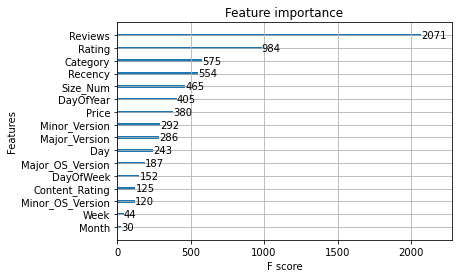

In [744]:
plot_importance(model)

In [745]:
y_pred = model.predict_proba(df_train_treated[tarining_cols])

In [746]:
y_pred_act = model.predict(df_train_treated[tarining_cols])

In [747]:
log_loss(df_train_treated['Downloads'],y_pred)

0.9136779241108909

In [748]:
accuracy_score(df_train_treated['Downloads'],y_pred_act)

0.6266045047226931

In [749]:
#pred_cols = sorted(df_train_treated['Downloads'].unique())

In [750]:
y_test_pred = pd.DataFrame(model.predict_proba(df_test_treated[tarining_cols])
                           #,columns=pred_cols
                          )

In [751]:
'''
y_test_pred_mod = y_test_pred[['10+',
 '50+',
 '100+',
 '500+',
 '1,000+',
 '5,000+',
 '10,000+',
 '50,000+',
 '100,000+',
 '500,000+',
 '1,000,000+',
 '5,000,000+',
 '10,000,000+',
 '50,000,000+',
 '100,000,000+',
 '500,000,000+',
 '1,000,000,000+',
 '5,000,000,000+']].copy()
'''

"\ny_test_pred_mod = y_test_pred[['10+',\n '50+',\n '100+',\n '500+',\n '1,000+',\n '5,000+',\n '10,000+',\n '50,000+',\n '100,000+',\n '500,000+',\n '1,000,000+',\n '5,000,000+',\n '10,000,000+',\n '50,000,000+',\n '100,000,000+',\n '500,000,000+',\n '1,000,000,000+',\n '5,000,000,000+']].copy()\n"

In [752]:
#y_test_pred_mod.columns = [x for x in range(0,18)]

In [753]:
y_pred_act_test = model.predict(df_test_treated[tarining_cols])

In [754]:
save_dataset(y_test_pred_mod,name='BASE_MODEL_ET_2_X')

In [755]:
#y_test_pred.head()

In [756]:
df_test_treated['MapDownloads'] = df_test_treated['key'].map(map_dict)
df_test_treated['Downloads'] = y_pred_act_test

In [757]:
#df_test_treated['MapDownloads'].value_counts()

In [758]:
df_test_treated['Downloads'] = y_pred_act_test

In [759]:
df_add = pd.concat([df_test_treated.reset_index(drop=True),y_test_pred],axis=1)
df_add.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,...,8,9,10,11,12,13,14,15,16,17
0,ps_id-18231,24,4.52,1362,36M,0.0,1,2020-05-05,1.4.1,4.0.3 and up,...,0.000118,0.000481,0.000824,0.000098,0.000101,0.197311,0.000131,0.000106,0.105994,0.000104
1,ps_id-1874,44,4.29,3353,Varies with device,0.0,4,2020-05-05,Varies with device,Varies with device,...,0.000216,0.000161,0.003087,0.000124,0.000105,0.062819,0.000116,0.000110,0.333600,0.000204
2,ps_id-3182,42,4.55,161855,Varies with device,0.0,1,2020-05-05,Varies with device,Varies with device,...,0.015147,0.000145,0.212919,0.000083,0.000085,0.000320,0.002881,0.000090,0.000736,0.000656
3,ps_id-31452,15,3.97,545,16M,0.0,1,2016-12-07,2,4.1 and up,...,0.000107,0.005184,0.000268,0.000094,0.000096,0.183420,0.000115,0.000101,0.020574,0.000099
4,ps_id-25641,42,4.65,1672,33M,0.0,1,2020-01-25,1,4.4 and up,...,0.000132,0.000646,0.000775,0.000115,0.000125,0.147746,0.000126,0.000124,0.085874,0.000122


In [760]:
#columns = [x for x in range(0,18)]

In [761]:
pred_cols = sorted(df_train_treated['Downloads'].unique())

In [762]:
pred_cols 

['1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5,000+',
 '5,000,000+',
 '5,000,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+']

In [763]:
pred_map = { pred_cols[i]:i for i in range(0,18)}
pred_map

{'1,000+': 0,
 '1,000,000+': 1,
 '1,000,000,000+': 2,
 '10+': 3,
 '10,000+': 4,
 '10,000,000+': 5,
 '100+': 6,
 '100,000+': 7,
 '100,000,000+': 8,
 '5,000+': 9,
 '5,000,000+': 10,
 '5,000,000,000+': 11,
 '50+': 12,
 '50,000+': 13,
 '50,000,000+': 14,
 '500+': 15,
 '500,000+': 16,
 '500,000,000+': 17}

In [764]:
df_add[['Downloads','MapDownloads']+columns][df_add['MapDownloads'].notnull()].head()

,Downloads,MapDownloads,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
223,"500,000+","100,000+",0.000178,0.276408,0.000129,0.000131,0.001813,0.008330,0.000129,0.233053,0.000151,0.000175,0.019169,0.000126,0.000129,0.005443,0.000143,0.000136,0.454223,0.000133
303,"100,000+","500,000+",0.000143,0.102936,0.000102,0.000104,0.006703,0.000250,0.000102,0.557663,0.000103,0.000162,0.014586,0.000100,0.000102,0.033408,0.000113,0.000107,0.283210,0.000105
369,"1,000,000+","1,000,000+",0.000094,0.748571,0.000076,0.000070,0.000122,0.005182,0.000069,0.032435,0.000081,0.000109,0.040631,0.000081,0.000069,0.000839,0.000076,0.000088,0.171338,0.000071
461,"100,000+","100,000+",0.001119,0.009055,0.000110,0.000112,0.139424,0.000232,0.000110,0.610590,0.000128,0.004078,0.000326,0.000107,0.000110,0.192458,0.000131,0.000115,0.041682,0.000113
475,"10,000+","10,000+",0.028622,0.000797,0.000113,0.000114,0.569864,0.000237,0.000158,0.101170,0.000156,0.063241,0.000204,0.000110,0.000149,0.230529,0.000114,0.001974,0.002334,0.000116


In [765]:
#df_new =pd.DataFrame()

In [766]:
for col in df_add['MapDownloads'].unique():
    if pd.isnull(col):
        continue
    cols_to_one = pred_map[col]
    cols_to_zero =[x for x in range(0,10) if x!=cols_to_one]
    df_add[cols_to_one] = np.where(df_add['MapDownloads']==col,0.99999,df_add[cols_to_one])
    for z in cols_to_zero:
        df_add[z] = np.where(df_add['MapDownloads']==col,0,df_add[z])

In [767]:
df_add[['Downloads','MapDownloads']+columns][df_add['MapDownloads'].notnull()].head()

,Downloads,MapDownloads,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
223,"500,000+","100,000+",0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.99999,0.0,0.0,0.019169,0.000126,0.000129,0.005443,0.000143,0.000136,0.454223,0.000133
303,"100,000+","500,000+",0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.014586,0.000100,0.000102,0.033408,0.000113,0.000107,0.999990,0.000105
369,"1,000,000+","1,000,000+",0.0,0.99999,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.040631,0.000081,0.000069,0.000839,0.000076,0.000088,0.171338,0.000071
461,"100,000+","100,000+",0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.99999,0.0,0.0,0.000326,0.000107,0.000110,0.192458,0.000131,0.000115,0.041682,0.000113
475,"10,000+","10,000+",0.0,0.00000,0.0,0.0,0.99999,0.0,0.0,0.00000,0.0,0.0,0.000204,0.000110,0.000149,0.230529,0.000114,0.001974,0.002334,0.000116


In [768]:
df_x = df_add[[x for x in range(0,18)]].copy()

In [769]:
df_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000148,0.006770,0.000122,0.000102,0.077433,0.000209,0.000117,0.609831,0.000118,0.000481,0.000824,0.000098,0.000101,0.197311,0.000131,0.000106,0.105994,0.000104
1,0.000148,0.148240,0.000112,0.000106,0.005125,0.000459,0.000126,0.445144,0.000216,0.000161,0.003087,0.000124,0.000105,0.062819,0.000116,0.000110,0.333600,0.000204
2,0.000120,0.068050,0.000104,0.000087,0.000230,0.697803,0.000088,0.000454,0.015147,0.000145,0.212919,0.000083,0.000085,0.000320,0.002881,0.000090,0.000736,0.000656
3,0.002201,0.005139,0.000097,0.000098,0.240954,0.000206,0.000096,0.541149,0.000107,0.005184,0.000268,0.000094,0.000096,0.183420,0.000115,0.000101,0.020574,0.000099
4,0.000180,0.012311,0.000118,0.000120,0.102741,0.000214,0.000137,0.648393,0.000132,0.000646,0.000775,0.000115,0.000125,0.147746,0.000126,0.000124,0.085874,0.000122


In [770]:
save_dataset(df_x,name='FINAL_TRY')